## Import Libraries

In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [3]:
url = "https://raw.githubusercontent.com/juancarlosvw/DATAMINING/refs/heads/main/diabetes.csv"
dataset = pd.read_csv(url,sep=',')
#dataset.sample(n=10)
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Exploratory Data Analysis

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
dataset.describe()
#showing mean,std,min and more from each column

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
dataset.dropna(inplace=True)
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

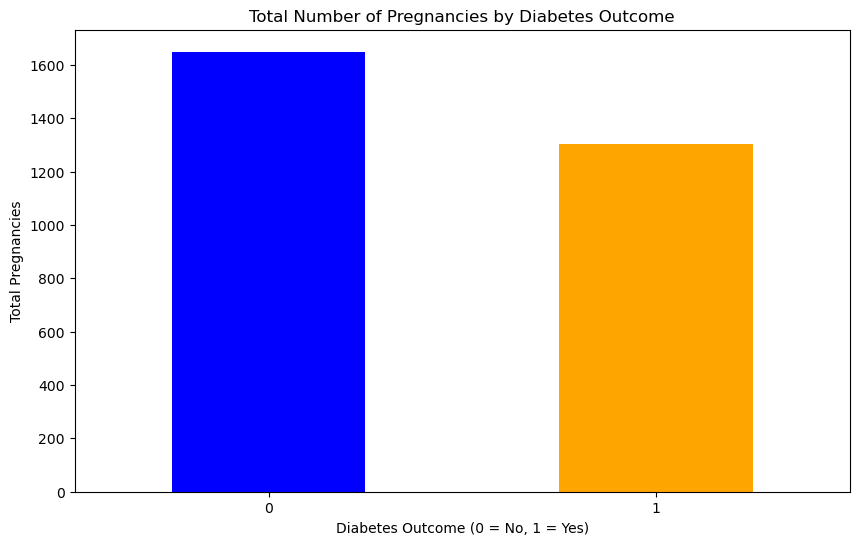

In [8]:
plt.figure(figsize=(10, 6))
dataset.groupby('Outcome')['Pregnancies'].sum().plot(kind='bar', color=['blue', 'orange'])
plt.title('Total Number of Pregnancies by Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0 = No, 1 = Yes)')
plt.ylabel('Total Pregnancies')
plt.xticks(rotation=0)
plt.show()

#to show total of pregnancies by diabetes outcume

## Machine Learning

1. Splitting X and y

In [9]:
X = dataset.drop('Outcome', axis=1)

y = dataset['Outcome']

2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33 , random_state=42)


In [11]:
X_train.shape,X_test.shape

((514, 8), (254, 8))

In [12]:
# Import DecisionTreeClassifier from sklearn
from sklearn.tree import DecisionTreeClassifier

# Instantiate the DecisionTreeClassifier model using the 'entropy' criterion
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# Fit the model with training data
clf_entropy.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [13]:
# Make predictions using the model with the 'entropy' criterion
y_pred_entropy = clf_entropy.predict(X_test)


In [14]:
from sklearn.metrics import accuracy_score 
print('Model accuracy score with criterion entropy: {0:0.4f}'. format (accuracy_score(y_test, y_pred_entropy)))

Model accuracy score with criterion entropy: 0.7165


[Text(0.5, 0.875, 'x[1] <= 154.5\nentropy = 0.938\nsamples = 514\nvalue = [332, 182]'),
 Text(0.25, 0.625, 'x[5] <= 26.35\nentropy = 0.822\nsamples = 432\nvalue = [321, 111]'),
 Text(0.125, 0.375, 'x[1] <= 124.5\nentropy = 0.23\nsamples = 107\nvalue = [103, 4]'),
 Text(0.0625, 0.125, 'entropy = 0.089\nsamples = 89\nvalue = [88, 1]'),
 Text(0.1875, 0.125, 'entropy = 0.65\nsamples = 18\nvalue = [15, 3]'),
 Text(0.375, 0.375, 'x[7] <= 30.5\nentropy = 0.914\nsamples = 325\nvalue = [218, 107]'),
 Text(0.3125, 0.125, 'entropy = 0.694\nsamples = 177\nvalue = [144, 33]'),
 Text(0.4375, 0.125, 'entropy = 1.0\nsamples = 148\nvalue = [74, 74]'),
 Text(0.75, 0.625, 'x[5] <= 28.7\nentropy = 0.569\nsamples = 82\nvalue = [11, 71]'),
 Text(0.625, 0.375, 'x[5] <= 25.35\nentropy = 0.98\nsamples = 12\nvalue = [5, 7]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6875, 0.125, 'entropy = 0.954\nsamples = 8\nvalue = [5, 3]'),
 Text(0.875, 0.375, 'x[0] <= 6.5\nentropy = 0.422\

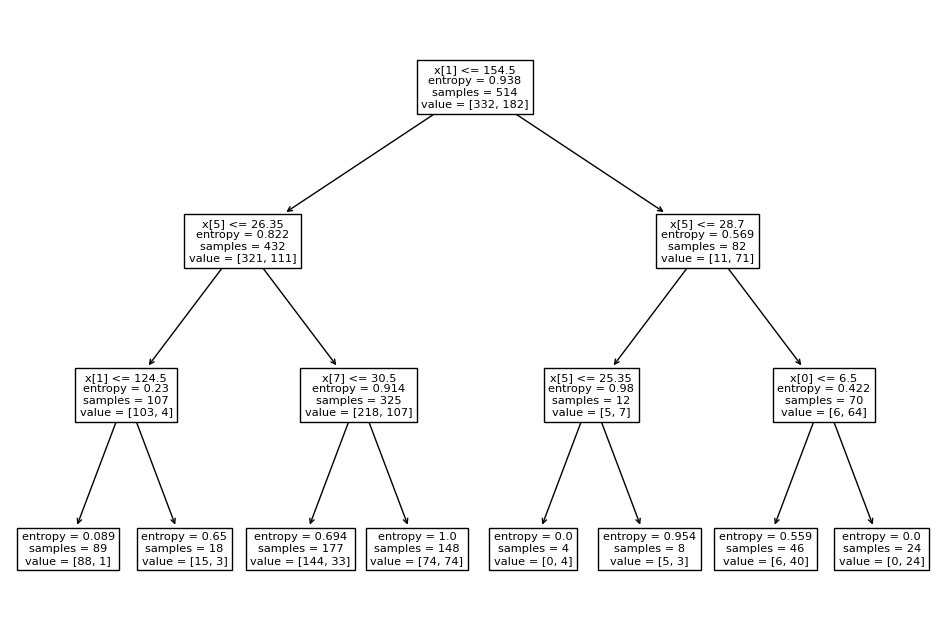

In [15]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_entropy.fit(X_train, y_train))

In [16]:
# Import DecisionTreeClassifier from sklearn
from sklearn.tree import DecisionTreeClassifier

# Membuat model DecisionTreeClassifier dengan kriteria gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# Melatih model dengan data training
clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=0)

In [17]:
y_pred_gini = clf_gini.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score

# Menghitung dan menampilkan skor akurasi model dengan kriteria gini index
print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))


Model accuracy score with criterion gini index: 0.6929


In [20]:
print(f"Training set score: {clf_gini.score(X_train, y_train):.4f}")
print(f"Test set score: {clf_gini.score(X_test, y_test):.4f}")

Training set score: 0.7724
Test set score: 0.6929


[Text(0.5, 0.875, 'x[1] <= 154.5\ngini = 0.457\nsamples = 514\nvalue = [332, 182]'),
 Text(0.25, 0.625, 'x[7] <= 30.5\ngini = 0.382\nsamples = 432\nvalue = [321, 111]'),
 Text(0.125, 0.375, 'x[1] <= 127.5\ngini = 0.24\nsamples = 251\nvalue = [216, 35]'),
 Text(0.0625, 0.125, 'gini = 0.153\nsamples = 203\nvalue = [186, 17]'),
 Text(0.1875, 0.125, 'gini = 0.469\nsamples = 48\nvalue = [30, 18]'),
 Text(0.375, 0.375, 'x[5] <= 26.95\ngini = 0.487\nsamples = 181\nvalue = [105, 76]'),
 Text(0.3125, 0.125, 'gini = 0.105\nsamples = 36\nvalue = [34, 2]'),
 Text(0.4375, 0.125, 'gini = 0.5\nsamples = 145\nvalue = [71, 74]'),
 Text(0.75, 0.625, 'x[5] <= 28.7\ngini = 0.232\nsamples = 82\nvalue = [11, 71]'),
 Text(0.625, 0.375, 'x[5] <= 25.35\ngini = 0.486\nsamples = 12\nvalue = [5, 7]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6875, 0.125, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.875, 0.375, 'x[6] <= 1.428\ngini = 0.157\nsamples = 70\nvalue = [6, 64]'),


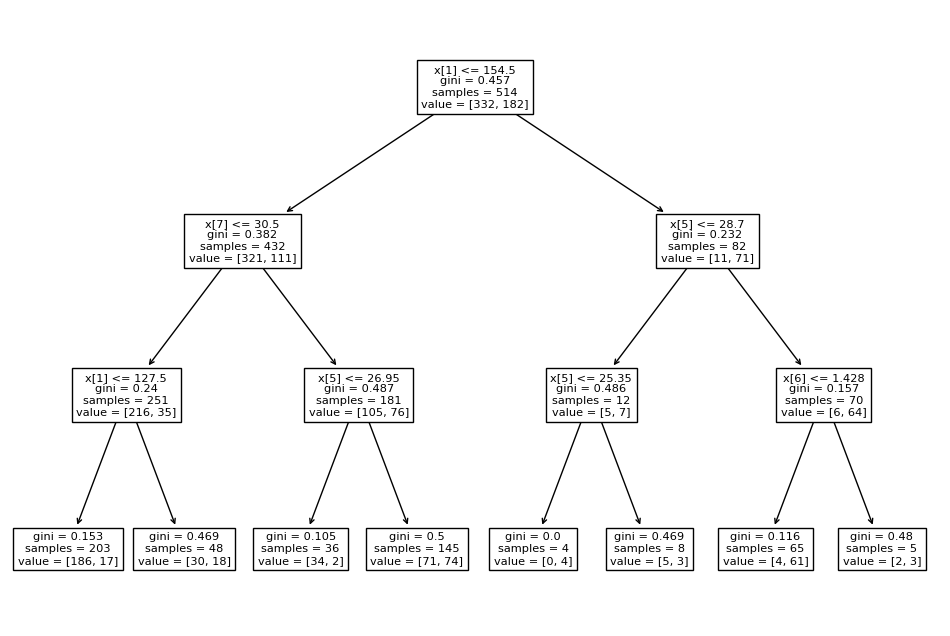

In [21]:
from sklearn import tree

plt.figure(figsize=(12, 8))
tree.plot_tree(clf_gini.fit(X_train, y_train))

3. Confusion matrix and classification report of criterion Entropy and Gini index

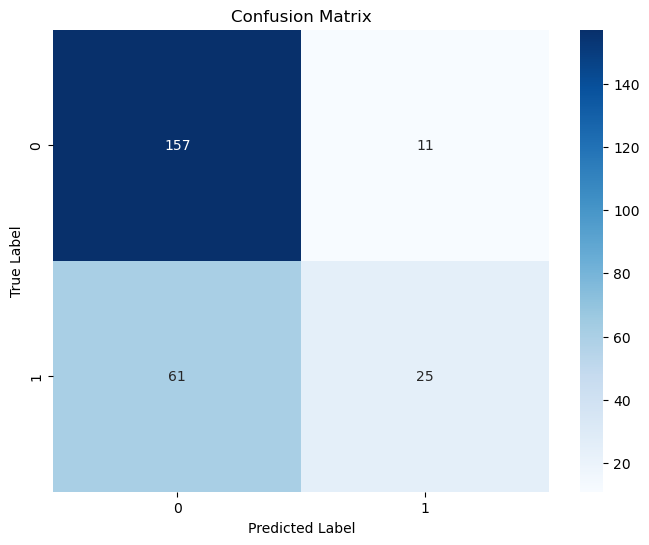

In [22]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_entropy)

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set labels and title
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the plot
plt.show()

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_entropy))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       168
           1       0.69      0.29      0.41        86

    accuracy                           0.72       254
   macro avg       0.71      0.61      0.61       254
weighted avg       0.71      0.72      0.68       254



from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gini))

In [29]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [30]:
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 73.62%
Confusion Matrix:
[[133  35]
 [ 32  54]]


In [31]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       168
           1       0.61      0.63      0.62        86

    accuracy                           0.74       254
   macro avg       0.71      0.71      0.71       254
weighted avg       0.74      0.74      0.74       254



In [32]:
print(f"Conclusion: The model achieved an accuracy of {accuracy * 100:.2f}% on the test set.")

Conclusion: The model achieved an accuracy of 73.62% on the test set.


Good Luck :)